In [ ]:
# Sudhanshu

In [1]:
import os

DATASET_PATH = "/kaggle/input"

os.listdir(DATASET_PATH)


['spacenet-an-optimally-distributed-astronomy-data']

In [2]:
BASE_PATH = "/kaggle/input/spacenet-an-optimally-distributed-astronomy-data"
os.listdir(BASE_PATH)


['SpaceNet.FLARE.imam_alam']

In [3]:
BASE_PATH = "/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam"
os.listdir(BASE_PATH)

['planet',
 'galaxy',
 'black hole',
 'asteroid',
 'comet',
 'star',
 'constellation',
 'nebula']

In [4]:
from collections import Counter

class_counts = {}

for class_name in os.listdir(BASE_PATH):
    class_path = os.path.join(BASE_PATH, class_name)
    if os.path.isdir(class_path):
        images = os.listdir(class_path)
        class_counts[class_name] = len(images)

class_counts


{'planet': 1472,
 'galaxy': 3984,
 'black hole': 656,
 'asteroid': 283,
 'comet': 416,
 'star': 3269,
 'constellation': 1552,
 'nebula': 1192}

In [5]:
import pandas as pd

df = pd.DataFrame(class_counts.items(), columns=["Class", "Number of Images"])
df


,Class,Number of Images
0,planet,1472
1,galaxy,3984
2,black hole,656
3,asteroid,283
4,comet,416
5,star,3269
6,constellation,1552
7,nebula,1192


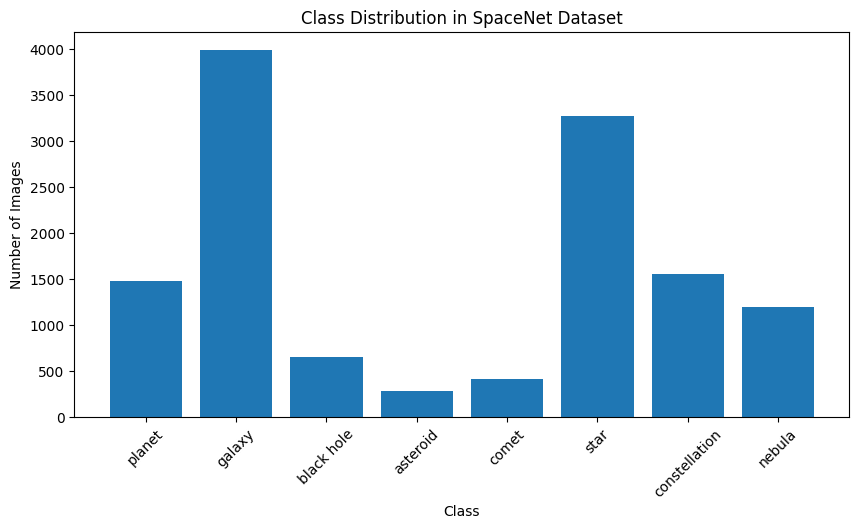

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(df["Class"], df["Number of Images"])
plt.xticks(rotation=45)
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Class Distribution in SpaceNet Dataset")
plt.show()


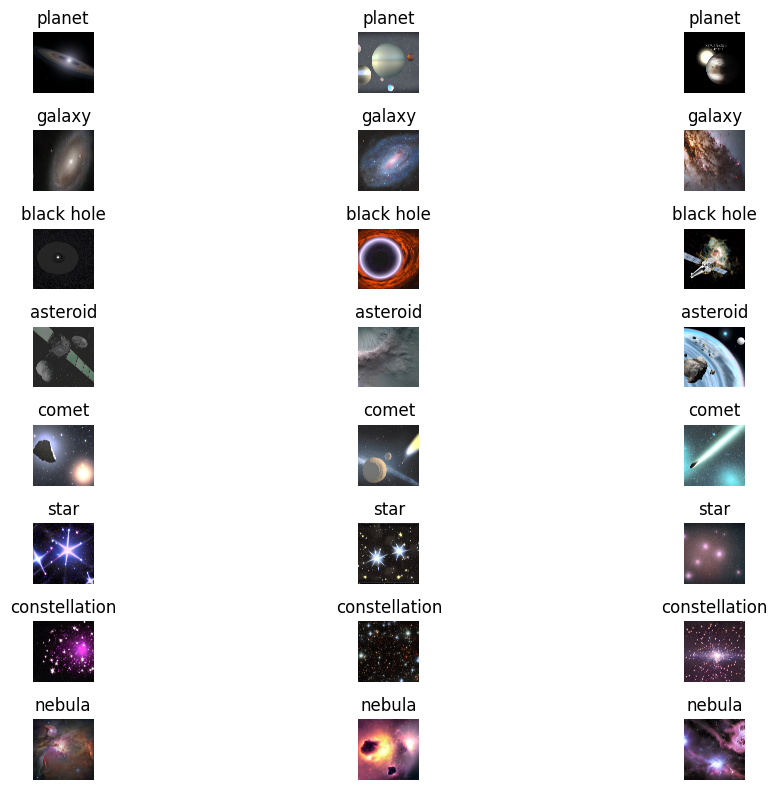

In [7]:
import random
from PIL import Image

plt.figure(figsize=(12,8))

plot_index = 1

for class_name in os.listdir(BASE_PATH):
    class_path = os.path.join(BASE_PATH, class_name)
    images = os.listdir(class_path)
    
    sample_images = random.sample(images, 3)
    
    for img_name in sample_images:
        img_path = os.path.join(class_path, img_name)
        img = Image.open(img_path)
        
        plt.subplot(len(os.listdir(BASE_PATH)), 3, plot_index)
        plt.imshow(img)
        plt.axis("off")
        plt.title(class_name)
        plot_index += 1

plt.tight_layout()
plt.show()


In [14]:
from PIL import Image
from collections import Counter
import random
import os

image_sizes = []
image_formats = Counter()
skipped_files = 0

for class_name in os.listdir(BASE_PATH):
    class_path = os.path.join(BASE_PATH, class_name)
    
    if not os.path.isdir(class_path):
        continue

    images = os.listdir(class_path)

    for img_name in random.sample(images, min(10, len(images))):
        img_path = os.path.join(class_path, img_name)

        try:
            with Image.open(img_path) as img:
                image_sizes.append(img.size)
                image_formats[img.format] += 1
        except Exception:
            skipped_files += 1
            continue

print("Sample Image Sizes:", image_sizes[:5])
print("Image Formats:", image_formats)
print("Skipped corrupted images:", skipped_files)


Sample Image Sizes: [(2048, 2048), (2048, 2048), (2048, 2048), (2048, 2048), (2048, 2048)]
Image Formats: Counter({'PNG': 76})
Skipped corrupted images: 4


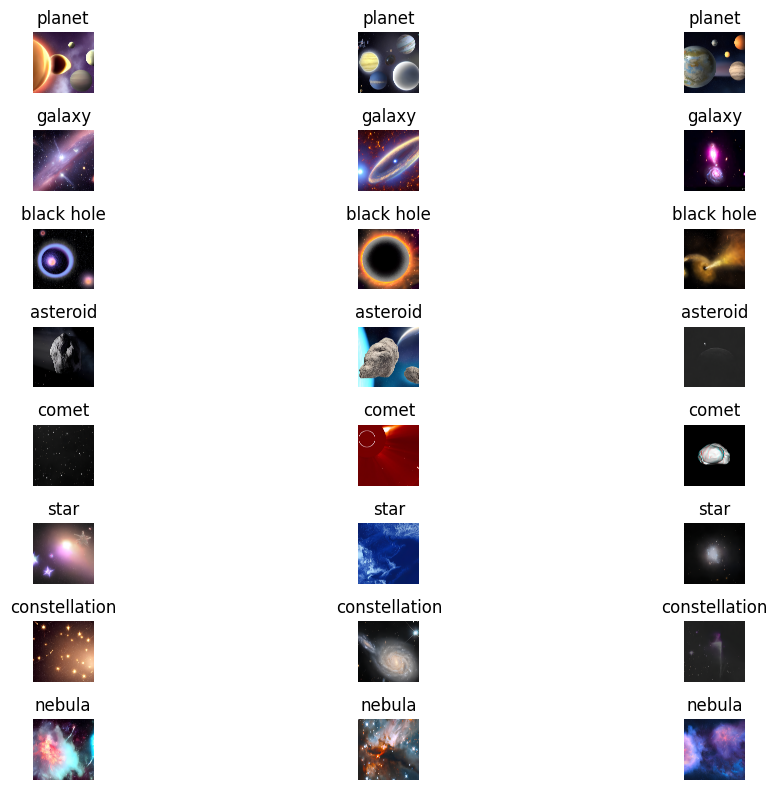

In [15]:
import matplotlib.pyplot as plt
import random
from PIL import Image
import os

plt.figure(figsize=(12, 8))
plot_index = 1

classes = [c for c in os.listdir(BASE_PATH) if os.path.isdir(os.path.join(BASE_PATH, c))]

for class_name in classes:
    class_path = os.path.join(BASE_PATH, class_name)
    images = os.listdir(class_path)

    sampled = 0
    for img_name in images:
        if sampled == 3:
            break

        img_path = os.path.join(class_path, img_name)

        try:
            with Image.open(img_path) as img:
                plt.subplot(len(classes), 3, plot_index)
                plt.imshow(img)
                plt.axis("off")
                plt.title(class_name)
                plot_index += 1
                sampled += 1
        except Exception:
            continue

plt.tight_layout()
plt.show()


### Data Quality Observations

- A small number of image files could not be opened due to corruption or unsupported encoding.
- Robust exception handling (`try–except`) was used to safely skip such files during visualization and analysis.
- This reflects real-world dataset imperfections commonly encountered in computer vision tasks.


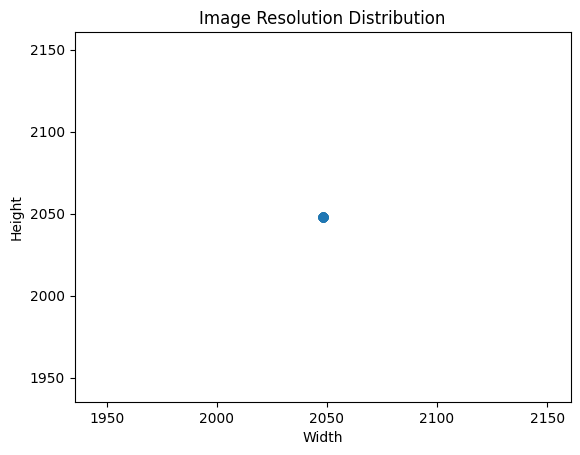

In [16]:
widths = [size[0] for size in image_sizes]
heights = [size[1] for size in image_sizes]

plt.scatter(widths, heights)
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Image Resolution Distribution")
plt.show()


## Key Observations

- The dataset contains multiple astronomy-related classes stored as separate folders.
- The number of images per class is imbalanced.
- Images across classes visually differ in structure and brightness patterns.
- Most images share similar resolutions.
- Images are primarily stored in PNG formats.
